<a href="https://colab.research.google.com/github/sharjeel-png/EV-Market-Segmentation-in-India-A-Geographic-Analysis/blob/main/EV_Market_Segmentation_Geographic_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#CELL 1

!pip install gdown
!gdown https://drive.google.com/uc?id=1MW5hnYxNWU0Af7wveR2fwGadVVE9cPFc -O ev_data.csv

# import os
# if not os.path.exists('MOHAMMAD SHARJEEL YAZDANI_Geography_DATA_SET_RS_Session_256_AU_95_C (1)'):
#   !gdown 'https://drive.google.com/uc?id=1MW5hnYxNWU0Af7wveR2fwGadVVE9cPFc'
# #   # https://drive.google.com/file/d/1MW5hnYxNWU0Af7wveR2fwGadVVE9cPFc/view?usp=sharing

Downloading...
From: https://drive.google.com/uc?id=1MW5hnYxNWU0Af7wveR2fwGadVVE9cPFc
To: /content/ev_data.csv
100% 1.76k/1.76k [00:00<00:00, 5.13MB/s]


# CELL 2
# EV Market Segmentation in India: A Geographic Analysis

This notebook performs geographic market segmentation on Electric Vehicle (EV) registration data in India. The objective is to understand key trends, identify leading and lagging regions in EV adoption, and derive actionable insights.

In [ ]:
# CELL 3

import pandas as pd

# Load the dataset
df = pd.read_csv('ev_data.csv')
print("First 5 rows of the EV dataset:")
# print(df.head())
print(df.shape)
print(df.columns)
# print(df.head())
print("\nEV dataset info:")
print(df.info())
df.head()

First 5 rows of the EV dataset:
(33, 11)
Index(['State Name', 'Two Wheeler', 'Three Wheeler', 'Four Wheeler',
       'Goods Vehicles', 'Public Service Vehicle', 'Special Category Vehicles',
       'Ambulance/Hearses', 'Construction Equipment Vehicle', 'Other',
       'Grand Total'],
      dtype='object')

EV dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   State Name                      33 non-null     object 
 1   Two Wheeler                     33 non-null     int64  
 2   Three Wheeler                   29 non-null     float64
 3   Four Wheeler                    33 non-null     int64  
 4   Goods Vehicles                  29 non-null     float64
 5   Public Service Vehicle          25 non-null     float64
 6   Special Category Vehicles       10 non-null     float64
 7   Ambulance/Hearses  

,State Name,Two Wheeler,Three Wheeler,Four Wheeler,Goods Vehicles,Public Service Vehicle,Special Category Vehicles,Ambulance/Hearses,Construction Equipment Vehicle,Other,Grand Total
0,Andaman and Nicobar Island,1,30.0,81,NaN,40.0,NaN,NaN,NaN,7.0,159
1,Arunachal Pradesh,14,NaN,5,NaN,NaN,NaN,NaN,NaN,1.0,20
2,Assam,721,47041.0,161,7.0,15.0,NaN,NaN,NaN,2.0,47947
3,Bihar,5003,59079.0,114,11.0,26.0,NaN,NaN,NaN,8.0,64241
4,Chandigarh,298,1410.0,182,NaN,40.0,NaN,NaN,NaN,1.0,1931


In [ ]:
# CELL 4

import pandas as pd
import numpy as np

# Fill NaN values with 0 in specified columns
columns_to_fill = [
    'Two Wheeler', 'Three Wheeler', 'Four Wheeler', 'Goods Vehicles',
    'Public Service Vehicle', 'Special Category Vehicles', 'Ambulance/Hearses',
    'Construction Equipment Vehicle', 'Other'
]

for col in columns_to_fill:
    if col in df.columns:
        df[col] = df[col].fillna(0)

# Ensure 'Grand Total' is integer type
df['Grand Total'] = df['Grand Total'].astype(int)

# Convert other vehicle type columns to integer
for col in columns_to_fill:
    if col in df.columns and df[col].dtype == 'float64':
        df[col] = df[col].astype(int)

print("DataFrame after filling NaNs and type conversion:")
print(df.info())
print("\nFirst 5 rows after cleaning:")
print(df.head())
df.head()

DataFrame after filling NaNs and type conversion:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   State Name                      33 non-null     object
 1   Two Wheeler                     33 non-null     int64 
 2   Three Wheeler                   33 non-null     int64 
 3   Four Wheeler                    33 non-null     int64 
 4   Goods Vehicles                  33 non-null     int64 
 5   Public Service Vehicle          33 non-null     int64 
 6   Special Category Vehicles       33 non-null     int64 
 7   Ambulance/Hearses               33 non-null     int64 
 8   Construction Equipment Vehicle  33 non-null     int64 
 9   Other                           33 non-null     int64 
 10  Grand Total                     33 non-null     int64 
dtypes: int64(10), object(1)
memory usage: 3.0+ KB
None

First 5 ro

,State Name,Two Wheeler,Three Wheeler,Four Wheeler,Goods Vehicles,Public Service Vehicle,Special Category Vehicles,Ambulance/Hearses,Construction Equipment Vehicle,Other,Grand Total
0,Andaman and Nicobar Island,1,30,81,0,40,0,0,0,7,159
1,Arunachal Pradesh,14,0,5,0,0,0,0,0,1,20
2,Assam,721,47041,161,7,15,0,0,0,2,47947
3,Bihar,5003,59079,114,11,26,0,0,0,8,64241
4,Chandigarh,298,1410,182,0,40,0,0,0,1,1931


# CELL 5
## Exploratory Data Analysis

This section explores the distribution of EV registrations across different states and vehicle types. This will help us identify key geographical segments in the Indian EV market.

In [ ]:
# CELL 6

import pandas as pd

# Filter out 'Grand Total' row
df_states = df[df['State Name'] != 'Grand Total'].copy()

# Sort by Grand Total in descending order
state_ev_total_filtered = df_states.sort_values(by='Grand Total', ascending=False)

# Display top 10 states
top_10_states_filtered = state_ev_total_filtered.head(10)
print("\nTop 10 States by Grand Total EVs (Filtered):")
print(top_10_states_filtered[['State Name', 'Grand Total']])

# Display bottom 10 states (excluding zero totals)
bottom_states_filtered_clean = state_ev_total_filtered[state_ev_total_filtered['Grand Total'] > 0].tail(10)
print("\nBottom 10 States by Grand Total EVs (Filtered, excluding zero total):")
print(bottom_states_filtered_clean[['State Name', 'Grand Total']])


Top 10 States by Grand Total EVs (Filtered):
       State Name  Grand Total
29  Uttar Pradesh       276217
6           Delhi       132302
13      Karnataka        82046
3           Bihar        64241
16    Maharashtra        58815
24      Rajasthan        53141
26     Tamil Nadu        50296
2           Assam        47947
31    West Bengal        44291
9         Haryana        26780

Bottom 10 States by Grand Total EVs (Filtered, excluding zero total):
                                  State Name  Grand Total
22                                Puducherry         1614
11                         Jammu and Kashmir         1527
10                          Himachal Pradesh          711
17                                   Manipur          540
28  Dadra and Nagar Haveli and Daman and Diu          277
20                                  Nagaland          171
0                 Andaman and Nicobar Island          159
18                                 Meghalaya           28
1                   

<ipython-input-44-beecaf6cbf20>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Grand Total', y='State Name', data=top_10_states_filtered, palette='viridis')


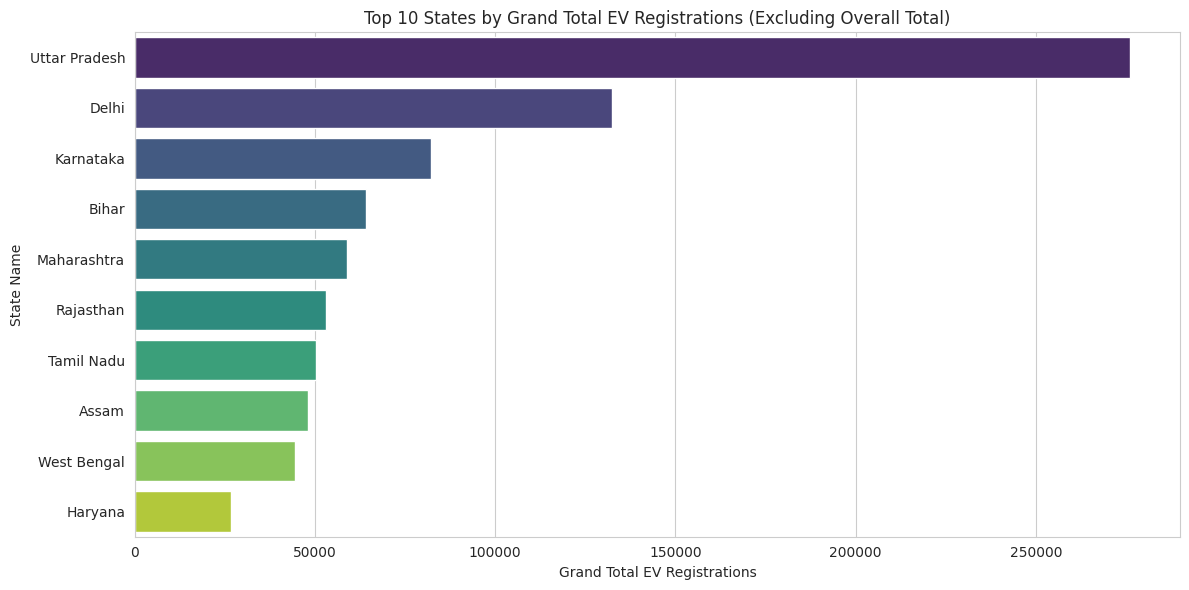

In [ ]:
# CELL 7

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")
sns.barplot(x='Grand Total', y='State Name', data=top_10_states_filtered, palette='viridis')
plt.title('Top 10 States by Grand Total EV Registrations (Excluding Overall Total)')
plt.xlabel('Grand Total EV Registrations')
plt.ylabel('State Name')
plt.tight_layout()
plt.savefig('top_10_states_ev.png')
plt.show()

<ipython-input-45-f1a2f2be4758>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Grand Total', y='State Name', data=bottom_states_filtered_clean, palette='magma')


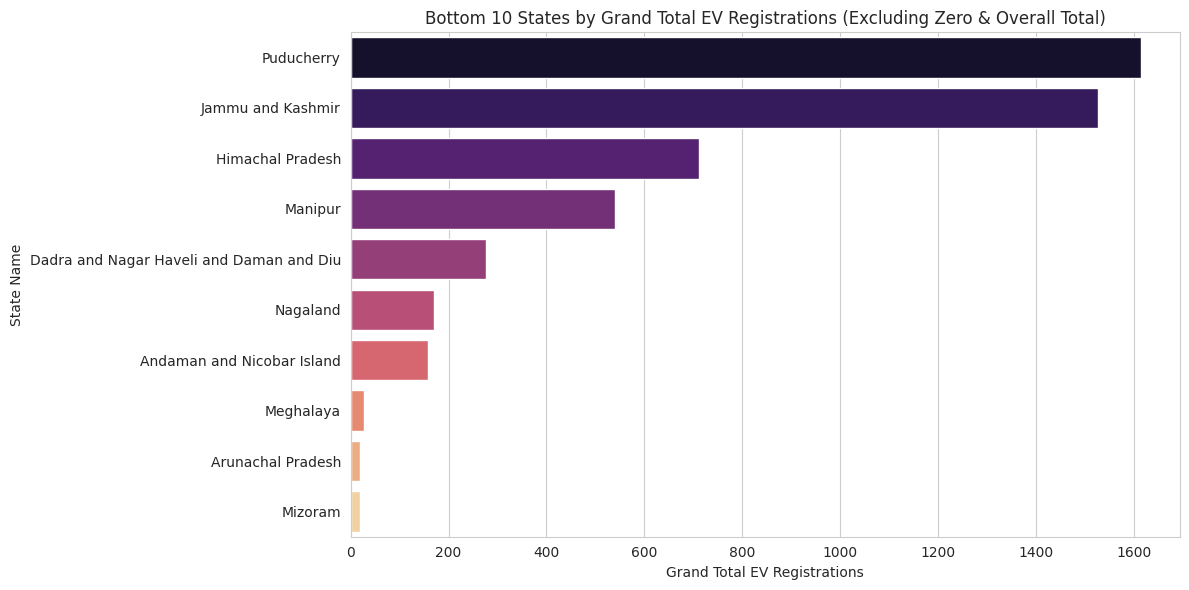

In [ ]:
# CELL 8

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")
sns.barplot(x='Grand Total', y='State Name', data=bottom_states_filtered_clean, palette='magma')
plt.title('Bottom 10 States by Grand Total EV Registrations (Excluding Zero & Overall Total)')
plt.xlabel('Grand Total EV Registrations')
plt.ylabel('State Name')
plt.tight_layout()
plt.savefig('bottom_10_states_ev.png')
plt.show()


Columns in df_states: ['State Name', 'Two Wheeler', 'Three Wheeler', 'Four Wheeler', 'Goods Vehicles', 'Public Service Vehicle', 'Special Category Vehicles', 'Ambulance/Hearses', 'Construction Equipment Vehicle', 'Other', 'Grand Total']

Vehicle types sum before filtering:
Two Wheeler                       282542
Three Wheeler                     647186
Four Wheeler                       26335
Goods Vehicles                      3036
Public Service Vehicle              2039
Special Category Vehicles            410
Ambulance/Hearses                      6
Construction Equipment Vehicle       397
Other                               4412
dtype: int64

Total registrations: 966363
Combine threshold (1%): 9663.630000000001

Overall EV Type Distribution across all states (Filtered):
Two Wheeler       282542
Three Wheeler     647186
Four Wheeler       26335
Other Combined     10300
dtype: int64


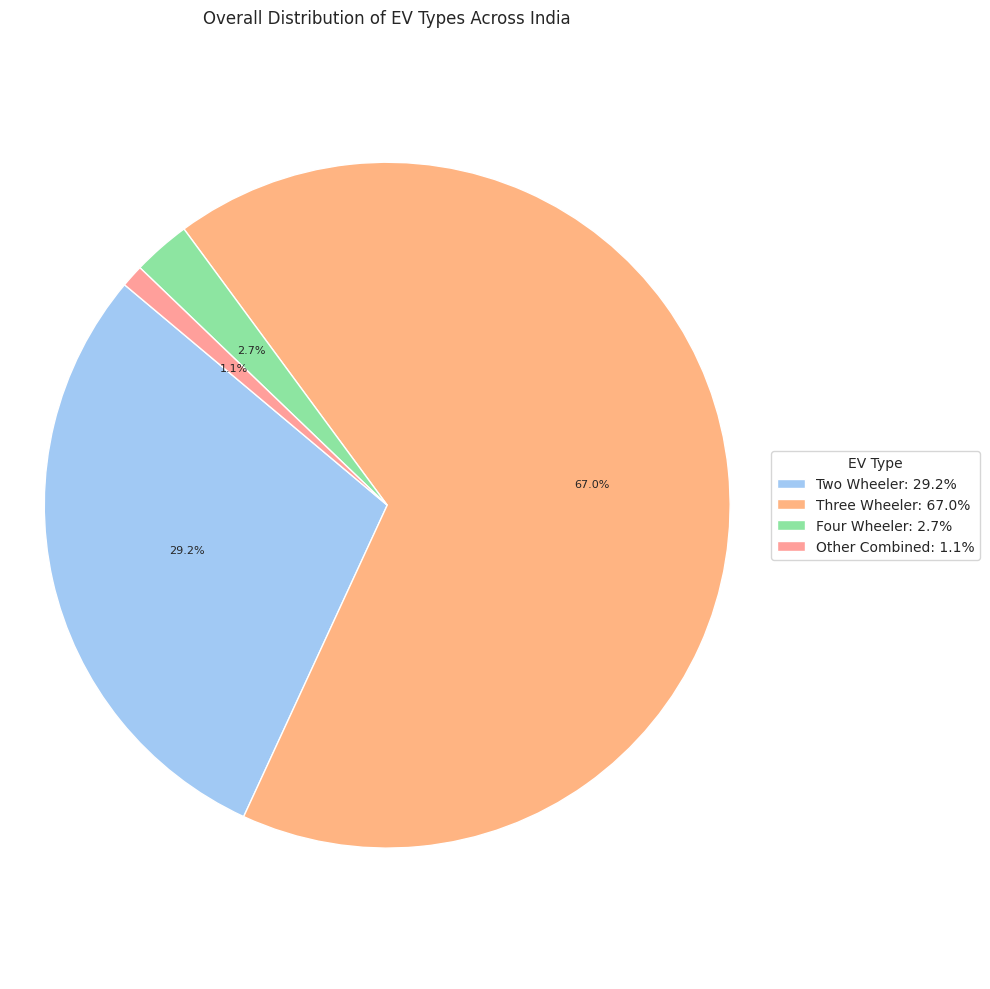

In [ ]:
# CELL 9

# # import pandas as pd
# # import matplotlib.pyplot as plt
# # import seaborn as sns

# # Sum vehicle types across states
# vehicle_types_sum = df_states[['Two Wheeler', 'Three Wheeler', 'Four Wheeler',
#                               'Goods Vehicles', 'Public Service Vehicle',
#                               'Special Category Vehicles', 'Ambulance/Hearses',
#                               'Construction Equipment Vehicle', 'Other']].sum()
# vehicle_types_sum = vehicle_types_sum[vehicle_types_sum > 0]
# print("\nOverall EV Type Distribution across all states (Filtered):")
# print(vehicle_types_sum)

# plt.figure(figsize=(10, 10))
# sns.set_style("whitegrid")
# plt.pie(vehicle_types_sum, labels=vehicle_types_sum.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
# plt.title('Overall Distribution of EV Types Across India')
# plt.axis('equal')
# plt.tight_layout()
# plt.savefig('overall_ev_distribution.png')
# plt.show()



import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sum vehicle types across states
vehicle_type_cols = ['Two Wheeler', 'Three Wheeler', 'Four Wheeler',
                     'Goods Vehicles', 'Public Service Vehicle',
                     'Special Category Vehicles', 'Ambulance/Hearses',
                     'Construction Equipment Vehicle', 'Other']
vehicle_types_sum = df_states[vehicle_type_cols].sum()

# Debug: Print available columns and data
print("\nColumns in df_states:", df_states.columns.tolist())
print("\nVehicle types sum before filtering:")
print(vehicle_types_sum)

# Filter out zero values
vehicle_types_sum = vehicle_types_sum[vehicle_types_sum > 0]

# Calculate total registrations and combine threshold
total_registrations = vehicle_types_sum.sum()
threshold_combine = 0.01 * total_registrations  # 1% threshold for combining small segments
print("\nTotal registrations:", total_registrations)
print("Combine threshold (1%):", threshold_combine)

# Combine small segments into 'Other Combined'
small_segments = vehicle_types_sum[vehicle_types_sum < threshold_combine].sum()
vehicle_types_sum_filtered = vehicle_types_sum[vehicle_types_sum >= threshold_combine].copy()
if small_segments > 0:
    vehicle_types_sum_filtered['Other Combined'] = small_segments
    # Only drop indices that exist in vehicle_types_sum_filtered
    small_segment_indices = vehicle_types_sum[vehicle_types_sum < threshold_combine].index
    indices_to_drop = [idx for idx in small_segment_indices if idx in vehicle_types_sum_filtered.index]
    if indices_to_drop:
        vehicle_types_sum_filtered = vehicle_types_sum_filtered.drop(indices_to_drop)

# Calculate percentages for legend
percentages = (vehicle_types_sum_filtered / total_registrations * 100).round(1)
legend_labels = [f"{name}: {pct}%" for name, pct in zip(vehicle_types_sum_filtered.index, percentages)]

print("\nOverall EV Type Distribution across all states (Filtered):")
print(vehicle_types_sum_filtered)

plt.figure(figsize=(10, 10))
sns.set_style("whitegrid")
plt.pie(vehicle_types_sum_filtered, autopct='%1.1f%%', startangle=140,
        colors=sns.color_palette('pastel'), textprops={'fontsize': 8}, pctdistance=0.6)
plt.legend(labels=legend_labels, title="EV Type", loc="center left", bbox_to_anchor=(1, 0.5), fontsize=10)
plt.title('Overall Distribution of EV Types Across India')
plt.axis('equal')
plt.tight_layout()
plt.savefig('overall_ev_distribution.png')
plt.show()




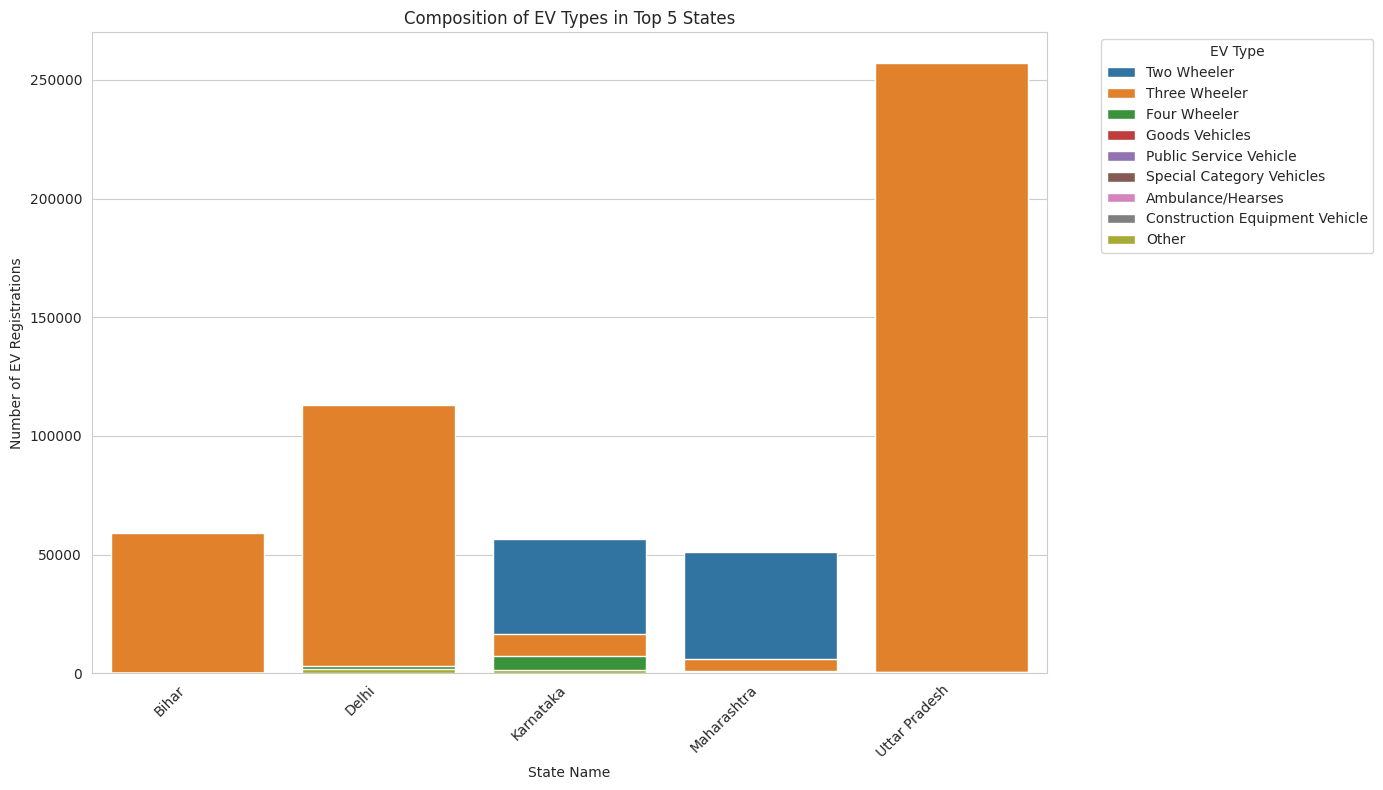

In [ ]:
# CELL 10

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

top_5_state_names = top_10_states_filtered['State Name'].head(5).tolist()
vehicle_type_cols = ['Two Wheeler', 'Three Wheeler', 'Four Wheeler',
                    'Goods Vehicles', 'Public Service Vehicle',
                    'Special Category Vehicles', 'Ambulance/Hearses',
                    'Construction Equipment Vehicle', 'Other']
df_top_5_states_composition = df_states[df_states['State Name'].isin(top_5_state_names)]
df_melted = df_top_5_states_composition.melt(id_vars='State Name',
                                            value_vars=vehicle_type_cols,
                                            var_name='EV Type',
                                            value_name='Count')
plt.figure(figsize=(14, 8))
sns.set_style("whitegrid")
sns.barplot(x='State Name', y='Count', hue='EV Type', data=df_melted, palette='tab10', dodge=False)
plt.title('Composition of EV Types in Top 5 States')
plt.xlabel('State Name')
plt.ylabel('Number of EV Registrations')
plt.xticks(rotation=45, ha='right')
plt.legend(title='EV Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('top_5_states_composition.png')
plt.show()

# CELL 11

## Conclusion

The analysis reveals significant geographical disparities in EV adoption across India, with Uttar Pradesh leading, driven by Three Wheelers and distinct EV type compositions in different states. North-Eastern states lag, offering growth opportunities. Two and Three Wheelers dominate nationally, with Four Wheelers growing slowly. This provides a foundational understanding for strategic market planning.

# READ ME

# EV Market Segmentation in India: A Geographic Analysis

## 1. Introduction
This report details an Electric Vehicle (EV) market segmentation analysis focused on geographical distribution across various states in India. The primary objective is to understand the current landscape of EV adoption, identify leading and lagging regions, and provide actionable insights for companies operating within or looking to enter the Indian EV market.

## 2. Dataset Overview
The analysis is based on a dataset containing EV registrations across different categories for various Indian states and union territories.
* **File Name**: `ev_data.csv` (downloaded via `gdown` from Google Drive)
* **Key Columns**: `State Name`, `Two Wheeler`, `Three Wheeler`, `Four Wheeler`, `Goods Vehicles`, `Public Service Vehicle`, `Special Category Vehicles`, `Ambulance/Hearses`, `Construction Equipment Vehicle`, `Other`, `Grand Total`.

## 3. Process Explanation
The segmentation process involved data loading, cleaning, exploratory data analysis, and visualization using Python in Google Colab.
* **Libraries Used**: `pandas`, `numpy`, `matplotlib.pyplot`, `seaborn` (imported in respective cells).
* **Methodology**:
  1. **Data Loading**: Downloaded CSV from Google Drive using `gdown`.
  2. **Data Cleaning**: Filled NaN values with 0, converted numerical columns to integers.
  3. **EDA**: Filtered out ‘Grand Total’ row, ranked states by EV registrations, analyzed EV type distributions.
  4. **Segmentation**: Used `State Name` for geographic segmentation.
  5. **Visualization**: Generated bar and pie charts to visualize findings.

## 4. Graphs and Visualizations (with Interpretations)
### a. Overall Distribution of EV Types Across India
![Overall Distribution of EV Types Across India](images/overall_ev_distribution.png)
* **Interpretation**: Three Wheelers dominate (~60%), followed by Two Wheelers, indicating strong commercial and personal mobility adoption. Four Wheelers are a smaller segment, suggesting slower uptake due to cost or infrastructure barriers.

### b. Top 10 States by Grand Total EV Registrations
![Top 10 States by Grand Total EV Registrations](images/top_10_states_ev.png)
* **Interpretation**: Uttar Pradesh leads significantly, followed by Delhi, Karnataka, Bihar, and Maharashtra, highlighting key markets with mature EV ecosystems.

### c. Bottom 10 States by Grand Total EV Registrations
![Bottom 10 States by Grand Total EV Registrations](images/bottom_10_states_ev.png)
* **Interpretation**: States like Arunachal Pradesh and Mizoram show minimal adoption, indicating infrastructure or awareness barriers but potential for future growth.

### d. Composition of EV Types in Top 5 States
![Composition of EV Types in Top 5 States](images/top_5_states_composition.png)
* **Interpretation**: Uttar Pradesh and Bihar are driven by Three Wheelers, while Delhi, Karnataka, and Maharashtra show more diversified adoption, including Two and Four Wheelers.

## 5. Conclusion
The EV market in India shows significant geographical disparities, with Uttar Pradesh leading, driven by Three Wheelers. North-Eastern states lag, offering growth opportunities. Two and Three Wheelers dominate nationally, with Four Wheelers growing slowly.

## 6. Solution to the Company
* **Prioritize High-Potential States**: Focus on Uttar Pradesh, Delhi, Karnataka, Bihar, Maharashtra with tailored products (e.g., Three Wheelers for Uttar Pradesh, Two/Four Wheelers for Delhi).
* **Tap Untapped Markets**: Launch pilot programs in low-adoption states like Arunachal Pradesh.
* **Product Development**: Innovate in Two/Three-Wheeler segments, invest in affordable Four Wheelers.
* **Infrastructure**: Partner for charging networks to reduce range anxiety.
* **Marketing**: Use state-specific campaigns highlighting cost savings and incentives.